In [0]:
!ls 

sample_data


In [0]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns
import numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline

In [0]:
train = pd.read_csv("sample_data/training.csv")
test = pd.read_csv("sample_data/test.csv")

In [0]:
train=train[:6000]

In [0]:
print(train.shape)
print(test.shape)

(6000, 16)
(3000, 15)


In [0]:
train.head()

,serial_number,time_stamp,1 year,2 year,3 year,4 year,5 year,6 year,7 year,8 year,9 year,10 year,15 year,20 year,25 year,30 year
0,1,2006-10-17,0.555,0.746,0.935,1.107,1.276,1.399,1.512,1.623,1.711,1.793,2.084,2.263,2.446,2.518
1,2,2006-10-16,0.553,0.746,0.938,1.117,1.284,1.407,1.523,1.630,1.710,1.792,2.076,2.250,2.439,2.511
2,3,2006-10-13,0.513,0.703,0.884,1.063,1.235,1.360,1.479,1.592,1.677,1.763,2.052,2.238,2.434,2.508
3,4,2006-10-12,0.489,0.688,0.862,1.037,1.205,1.326,1.446,1.563,1.655,1.746,2.038,2.233,2.434,2.508
4,5,2006-10-11,0.486,0.692,0.868,1.043,1.208,1.326,1.444,1.558,1.649,1.739,2.028,2.224,2.429,2.504


In [0]:
test.head()

,serial_number,time_stamp,1 year,2 year,3 year,4 year,6 year,7 year,8 year,9 year,10 year,15 year,20 year,25 year,30 year
0,1,2019-01-15,-0.160,-0.153,-0.154,-0.149,-0.146,-0.146,-0.105,-0.045,0.014,0.269,0.486,0.605,0.696
1,2,2019-01-11,-0.148,-0.153,-0.157,-0.155,-0.152,-0.150,-0.107,-0.046,0.014,0.269,0.488,0.605,0.696
2,3,2019-01-10,-0.147,-0.148,-0.154,-0.155,-0.146,-0.146,-0.102,-0.036,0.024,0.279,0.505,0.621,0.710
3,4,2019-01-09,-0.144,-0.147,-0.154,-0.152,-0.141,-0.136,-0.092,-0.033,0.029,0.286,0.519,0.631,0.720
4,5,2019-01-08,-0.146,-0.147,-0.158,-0.160,-0.152,-0.146,-0.102,-0.049,0.014,0.269,0.500,0.614,0.706


In [0]:
train = train[::-1] 
test = test[::-1]
train.head()

,serial_number,time_stamp,1 year,2 year,3 year,4 year,5 year,6 year,7 year,8 year,9 year,10 year,15 year,20 year,25 year,30 year
5999,6000,1983-04-02,6.937,6.958,7.053,7.365,7.744,7.900,7.365,7.721,7.863,NaN,NaN,NaN,NaN,NaN
5998,5999,1983-04-04,6.933,6.961,7.053,7.375,7.747,7.889,7.362,7.716,7.858,NaN,NaN,NaN,NaN,NaN
5997,5998,1983-04-05,6.942,6.960,7.062,7.394,7.756,7.906,7.364,7.732,7.877,NaN,NaN,NaN,NaN,NaN
5996,5997,1983-04-06,6.940,6.959,7.063,7.379,7.749,7.898,7.347,7.702,7.836,NaN,NaN,NaN,NaN,NaN
5995,5996,1983-04-07,6.889,6.929,7.055,7.361,7.732,7.888,7.337,7.695,7.828,NaN,NaN,NaN,NaN,NaN


In [0]:
train = train.set_index('time_stamp')
train.head()

,serial_number,1 year,2 year,3 year,4 year,5 year,6 year,7 year,8 year,9 year,10 year,15 year,20 year,25 year,30 year
time_stamp,,,,,,,,,,,,,,,
1983-04-02,6000,6.937,6.958,7.053,7.365,7.744,7.900,7.365,7.721,7.863,NaN,NaN,NaN,NaN,NaN
1983-04-04,5999,6.933,6.961,7.053,7.375,7.747,7.889,7.362,7.716,7.858,NaN,NaN,NaN,NaN,NaN
1983-04-05,5998,6.942,6.960,7.062,7.394,7.756,7.906,7.364,7.732,7.877,NaN,NaN,NaN,NaN,NaN
1983-04-06,5997,6.940,6.959,7.063,7.379,7.749,7.898,7.347,7.702,7.836,NaN,NaN,NaN,NaN,NaN
1983-04-07,5996,6.889,6.929,7.055,7.361,7.732,7.888,7.337,7.695,7.828,NaN,NaN,NaN,NaN,NaN


In [0]:
test = test.set_index('time_stamp')
test.head()

,serial_number,1 year,2 year,3 year,4 year,6 year,7 year,8 year,9 year,10 year,15 year,20 year,25 year,30 year
time_stamp,,,,,,,,,,,,,,
2006-10-17,3000,0.555,0.746,0.935,1.107,1.399,1.512,1.623,1.711,1.793,2.084,2.263,2.446,2.518
2006-10-18,2999,0.568,0.772,0.960,1.128,1.420,1.526,1.633,1.716,1.798,2.089,2.263,2.446,2.514
2006-10-19,2998,0.591,0.803,0.989,1.152,1.429,1.531,1.638,1.720,1.799,2.086,2.258,2.442,2.505
2006-10-20,2997,0.592,0.783,0.976,1.137,1.422,1.525,1.633,1.720,1.798,2.082,2.254,2.439,2.500
2006-10-23,2996,0.600,0.800,0.997,1.168,1.456,1.558,1.667,1.754,1.831,2.109,2.280,2.463,2.525


In [0]:
train.isnull().any()

serial_number    False
1 year           False
2 year           False
3 year           False
4 year           False
5 year           False
6 year           False
7 year           False
8 year           False
9 year           False
10 year           True
15 year           True
20 year           True
25 year           True
30 year           True
dtype: bool

In [0]:
test.isnull().any()

serial_number    False
1 year           False
2 year           False
3 year           False
4 year           False
6 year           False
7 year           False
8 year           False
9 year           False
10 year          False
15 year          False
20 year          False
25 year          False
30 year          False
dtype: bool

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


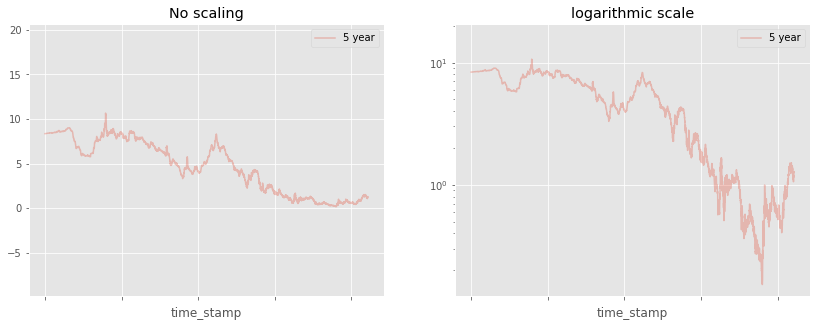

In [0]:
plt.figure(num=None, figsize=(14, 5))
plt.subplot(1,2,1)
ax = train['5 year'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(np.min(train['5 year']) - 10, np.max(train['5 year']) + 10)
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = train['5 year'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(np.min(train['5 year']) - 10, np.max(train['5 year']) + 10)
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()



In [0]:
train_data=train[['4 year', '5 year', '6 year', '7 year', '8 year', '9 year', '4 year', '5 year', '6 year', '7 year', '8 year', '9 year']]
#test_data=test[['4 year', '5 year', '6 year', '7 year', '8 year', '9 year']]

In [0]:

from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_data)
model_fit = model.fit()

prediction = model_fit.forecast(model_fit.y, steps=len(test))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [0]:
prediction[::-1]

array([[-0.2947806 , -0.04530661,  0.18073934,  0.38245633,  0.59437082,
         0.73825171],
       [-0.29441204, -0.04494746,  0.18109176,  0.38280119,  0.5947053 ,
         0.73857908],
       [-0.29404345, -0.04458828,  0.18144421,  0.38314608,  0.59503982,
         0.73890647],
       ...,
       [ 1.10423851,  1.27344996,  1.39754923,  1.51227207,  1.62410791,
         1.71249521],
       [ 1.10515776,  1.27429804,  1.39803087,  1.51218463,  1.62374281,
         1.7120027 ],
       [ 1.10607825,  1.27514806,  1.39851445,  1.51209395,  1.62337352,
         1.71150432]])

In [0]:
prediction.shape

(3000,)

In [0]:
submit=pd.read_csv('sample_data/sample_submission.csv')
submit['5 year']=prediction[::-1]
submit.head()

,serial_number,5 year
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [0]:
submit.to_csv('submit.csv',index=False)
submit.tail()

,serial_number,5 year
2995,2996,1.271760
2996,2997,1.272604
2997,2998,1.273450
2998,2999,1.274298
2999,3000,1.275148


In [0]:
X_train=train[['1 year', '2 year', '3 year', '4 year', '6 year', '7 year', '8 year', '9 year']]
Y_train=train['5 year']
X_test=test[['1 year', '2 year', '3 year', '4 year', '6 year', '7 year', '8 year', '9 year']]



from sklearn.linear_model import LassoCV, RidgeCV

xgb = LassoCV()
xgb.fit(X_train, Y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [0]:
preds = xgb.predict(X_test)

In [0]:
preds[-1]

-0.14263599664389515

In [0]:
submit=pd.read_csv('sample_data/sample_submission.csv')
submit['5 year']=preds[::-1]
submit.to_csv('submit.csv',index=False)

In [0]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['5 year'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
pred_uc = results.get_forecast(steps=3000)

TypeError: ignored

In [0]:
future = m.make_future_dataframe(periods=len(test))
forecast = m.predict(future)

In [0]:
forecast=forecast[-3000:]


In [0]:
forecast['yhat']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8430,2006-10-18,0.718039,0.334015,1.237137,0.718039,0.718039,0.058322,0.058322,0.058322,0.001010,0.001010,0.001010,0.057313,0.057313,0.057313,0.0,0.0,0.0,0.776361
8431,2006-10-19,0.718041,0.315843,1.223833,0.718041,0.718041,0.053452,0.053452,0.053452,-0.002125,-0.002125,-0.002125,0.055577,0.055577,0.055577,0.0,0.0,0.0,0.771493
8432,2006-10-20,0.718043,0.279461,1.239325,0.718043,0.718043,0.051624,0.051624,0.051624,-0.001979,-0.001979,-0.001979,0.053603,0.053603,0.053603,0.0,0.0,0.0,0.769667
8433,2006-10-21,0.718045,0.327668,1.220041,0.718045,0.718045,0.048548,0.048548,0.048548,-0.002871,-0.002871,-0.002871,0.051419,0.051419,0.051419,0.0,0.0,0.0,0.766593
8434,2006-10-22,0.718047,0.324752,1.219472,0.718047,0.718047,0.048429,0.048429,0.048429,-0.000626,-0.000626,-0.000626,0.049055,0.049055,0.049055,0.0,0.0,0.0,0.766476


In [0]:
submit=pd.read_csv('sample_data/sample_submission.csv')
submit['5 year']=preds[::-1]
submit.to_csv('submit.csv',index=False)